# Exercício: SVM com Dados Reais (Dataset Glass Identification)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [19]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features 
y = glass_identification.data.targets 

In [20]:
print(glass_identification.variables)

             name     role         type demographic       description  \
0       Id_number       ID      Integer        None              None   
1              RI  Feature   Continuous        None  refractive index   
2              Na  Feature   Continuous        None            Sodium   
3              Mg  Feature   Continuous        None         Magnesium   
4              Al  Feature   Continuous        None          Aluminum   
5              Si  Feature   Continuous        None           Silicon   
6               K  Feature   Continuous        None         Potassium   
7              Ca  Feature   Continuous        None           Calcium   
8              Ba  Feature   Continuous        None            Barium   
9              Fe  Feature   Continuous        None              Iron   
10  Type_of_glass   Target  Categorical        None              None   

                                    units missing_values  
0                                    None             no  
1    

In [21]:
print(X.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0


## Separando Dados de Treino e Teste

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

## Loop de Treinamento Básico

In [23]:
svm = SVC(kernel='linear', C = 4, random_state=42)

accuracies = []
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
    
    svm.fit(X_train_kf, y_train_kf)
    y_pred = svm.predict(X_test_kf)

    acc = classification_report(y_test_kf, y_pred, output_dict=True)['accuracy']
    accuracies.append(acc)

print(f'Kernel: {svm.kernel}, C: {svm.C}, Folds: {kf.n_splits}')
print(f'Acurácia Média: {np.mean(accuracies):.2f}, Desvio Padrão: {np.std(accuracies):.2f}\n')

Kernel: linear, C: 4, Folds: 10
Acurácia Média: 0.61, Desvio Padrão: 0.15



## Variando o Kernel

In [24]:
svm = SVC(kernel='linear', C = 4, random_state=42)
seqk = ['linear', 'poly', 'rbf', 'sigmoid']
avg_acc = []
for kernel in seqk:
    svm.kernel = kernel
    accuracies = []
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
        
        svm.fit(X_train_kf, y_train_kf)
        y_pred = svm.predict(X_test_kf)

        acc = classification_report(y_test_kf, y_pred, output_dict=True)['accuracy']
        accuracies.append(acc)
    
    print(f'\tKernel = {kernel}, Acurácia Média = {np.mean(accuracies):.2f}\n')

	Kernel = linear, Acurácia Média = 0.61

	Kernel = poly, Acurácia Média = 0.31

	Kernel = rbf, Acurácia Média = 0.31

	Kernel = sigmoid, Acurácia Média = 0.31



## Variando o valor de C para cada kernel

### Kernel RBF

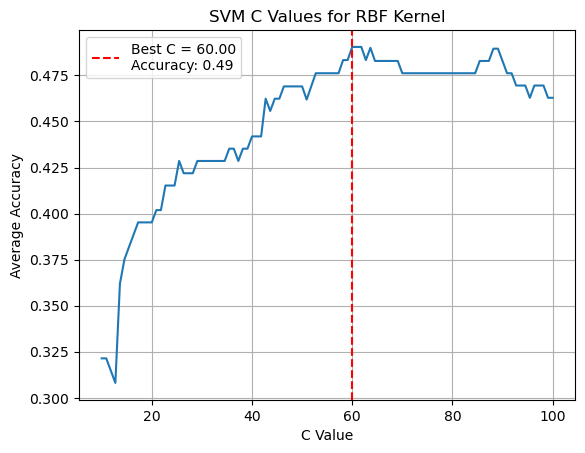

In [25]:
svm = SVC(kernel='rbf', C = 4, random_state=42)
seqc = np.linspace(10, 100, 100)
avg_acc = []
for c in seqc:
    svm.C = c
    accuracies = []
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
        
        svm.fit(X_train_kf, y_train_kf)
        y_pred = svm.predict(X_test_kf)

        acc = classification_report(y_test_kf, y_pred, output_dict=True)['accuracy']
        accuracies.append(acc)

    avg_acc.append(np.mean(accuracies))
    # print(f'\tC = {svm.C}, Acurácia Média = {np.mean(accuracies):.2f}\n')

plt.plot(seqc, avg_acc)
best_c = seqc[np.argmax(avg_acc)]
plt.axvline(x=best_c, color='r', linestyle='--', label=f'Best C = {best_c:.2f}\nAccuracy: {np.max(avg_acc):.2f}')
plt.xlabel('C Value')
plt.ylabel('Average Accuracy')
plt.title('SVM C Values for RBF Kernel')
plt.grid()
plt.legend()

### Kernel Linear

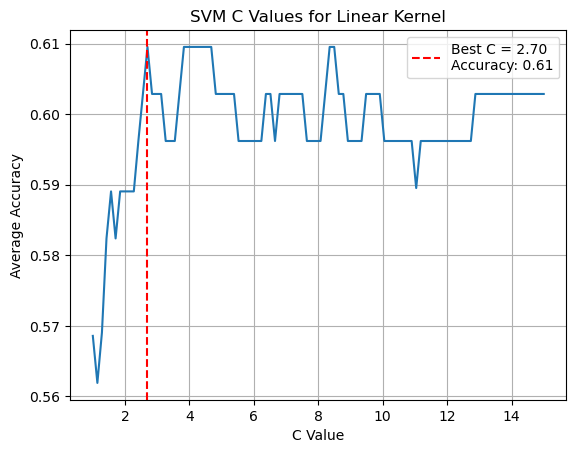

In [26]:
svm = SVC(kernel='linear', C = 4, random_state=42)
seqc = np.linspace(1, 15, 100)
avg_acc = []
for c in seqc:
    svm.C = c
    accuracies = []
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
        
        svm.fit(X_train_kf, y_train_kf)
        y_pred = svm.predict(X_test_kf)

        acc = classification_report(y_test_kf, y_pred, output_dict=True)['accuracy']
        accuracies.append(acc)

    avg_acc.append(np.mean(accuracies))
    # print(f'\tC = {svm.C}, Acurácia Média = {np.mean(accuracies):.2f}\n')

plt.plot(seqc, avg_acc)
best_c = seqc[np.argmax(avg_acc)]
plt.axvline(x=best_c, color='r', linestyle='--', label=f'Best C = {best_c:.2f}\nAccuracy: {np.max(avg_acc):.2f}')
plt.xlabel('C Value')
plt.ylabel('Average Accuracy')
plt.title('SVM C Values for Linear Kernel')
plt.grid()
plt.legend()

### Kernel Sigmoid

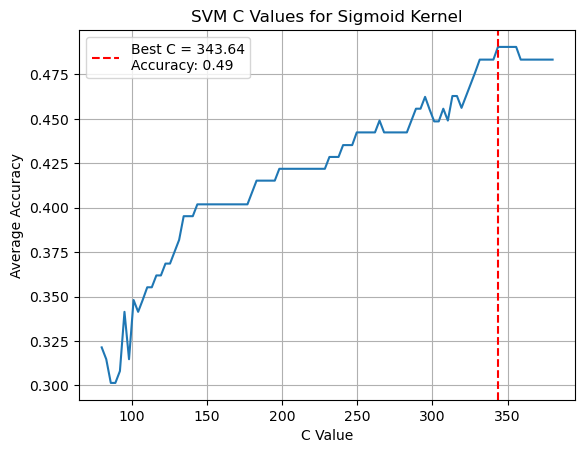

In [27]:
svm = SVC(kernel='sigmoid', C = 4, random_state=42, gamma = 'scale')
seqc = np.linspace(80, 380, 100)
avg_acc = []
for c in seqc:
    svm.C = c
    accuracies = []
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
        
        svm.fit(X_train_kf, y_train_kf)
        y_pred = svm.predict(X_test_kf)

        acc = classification_report(y_test_kf, y_pred, output_dict=True)['accuracy']
        accuracies.append(acc)

    avg_acc.append(np.mean(accuracies))

plt.plot(seqc, avg_acc)
best_c = seqc[np.argmax(avg_acc)]
plt.axvline(x=best_c, color='r', linestyle='--', label=f'Best C = {best_c:.2f}\nAccuracy: {np.max(avg_acc):.2f}')
plt.xlabel('C Value')
plt.ylabel('Average Accuracy')
plt.title('SVM C Values for Sigmoid Kernel')
plt.grid()
plt.legend()

### Kernel Poly

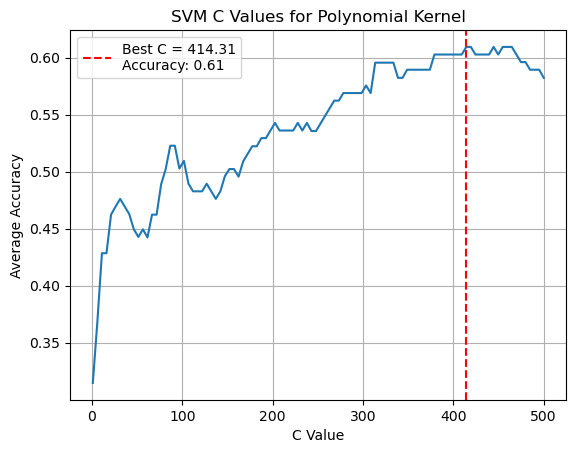

In [28]:
svm = SVC(kernel='poly', C = 4, random_state=42, gamma = 'scale')
seqc = np.linspace(1, 500, 100)
avg_acc = []
for c in seqc:
    svm.C = c
    accuracies = []
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
        
        svm.fit(X_train_kf, y_train_kf)
        y_pred = svm.predict(X_test_kf)

        acc = classification_report(y_test_kf, y_pred, output_dict=True)['accuracy']
        accuracies.append(acc)

    avg_acc.append(np.mean(accuracies))

plt.plot(seqc, avg_acc)
best_c = seqc[np.argmax(avg_acc)]
plt.axvline(x=best_c, color='r', linestyle='--', label=f'Best C = {best_c:.2f}\nAccuracy: {np.max(avg_acc):.2f}')
plt.xlabel('C Value')
plt.ylabel('Average Accuracy')
plt.title('SVM C Values for Polynomial Kernel')
plt.grid()
plt.legend()

## Projeção no Espaço de Similaridades